# Numpy & Pandas

 (from Code/Astro) Authors: BJ Fulton and Sarah Blunt

## Numpy and Arrays

Numpy is a powerful numeric library that is essential for anyone analyzing data with Python. Numpy is a huge package that can support a multitude of tasks. Numpy is also inextricably linked to SciPy, a powerful library for scientific computing with capabilities for fitting, linear algebra, machine learning, etc. Here we are just going to cover some of the basics of numpy, but I encourage you to check out the numpy documentation pages (https://numpy.org/doc/stable/) to get an idea of the variety of things you can do.

Arrays are a data type which is fundamental to Numpy. In some ways Numpy arrays are like Python lists:
- both are used for storing data/objects
- both are mutable (i.e. you can change their elements)
- items can be extracted from both using indexing and slicing
- both can be iterated over

However there are key aspects of arrays that make them very different:
- most operators act on the elements of an array instead of the array as a whole
- arrays can only hold data of a single type
- arrays can efficiently store large amounts of data in memory
- arrays are of fixed size in memory, whereas lists don't have fixed size. (Question: if arrays have fixed size, how do you think [numpy.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html) works?)

Numpy is well suited for astronomy as we often have fixed-sized data of a single type (e.g., 2D images, 1D spectra, 3D spectral datacubes)


In [1]:
import numpy as np

# create some sample lists
xlist = [1, 2, 3, 4]
ylist = [1, 4, 9, 16]

# create some sample arrays
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

First let's check out the different behaviors between lists and arrays

In [ ]:
print(xlist * 4)

print(x * 4)

print(x / 4)

print(xlist / 4)

Notice how the list was repeated 4 times, whereas each element of the array was multiplied by 4 and the result ended up being the same length.

Division works element-wise for arrays, but division is not defined and produces an error when performed on a list.

## Manipulating Arrays

Iterating over a 1D array looks just like iterating over a list

In [ ]:
for val in xlist:
    print(val)

for val in x:
    print(val)

Iterating an N-dimensional array will iterate over slices along the first dimension.

In [ ]:
y = np.random.uniform(size=(5, 5))

for val in y:
    print("row", val)

print()
# you could accomplish the same thing like this (but it's less readible and marginally less efficient)
for i in range(y.shape[0]):
    val = y[i, :]
    print("row {0}".format(i), val)

print()
# use a nested for loop to iterate over both dimensions
# however: generally, use numpy functions rather than a double for loop to iterate over them
for row in y:
    for val in row:
        new_val = val * val
        print(new_val)
print()
# simpler and faster:
y2 = y * y
print(y2)

A nice feature of numpy is that we can also select subsets of the array using conditionals.

In [ ]:
print(x)
xs = x[x < 3]
print(xs)

In general, setting an array equal to another does not create a new array (pass by reference). In other words, editing either array will modify the other.

Just like for lists, you can use the copy method if you really need a new copy of the array.

In [ ]:
print(x)
z = x.copy()
x[3] = 20
print(z)

hstack and vstack are useful to stitch together multiple arrays

In [ ]:
# hstack stitches together along the first dimension
hstack = np.hstack((x, z))
print(hstack)

print()
# vstack stitches along the last dimension
vstack = np.vstack((x, z))
print(vstack)

### Best practices

- If it's important that your code is fast, it's almost always better to avoid for loops when dealing with arrays. Use numpy operations! ("vectorized code")
- If I'm working on a complicated problem and I'm unsure whether to use a loop or vectorized operations, I usually write it up in a loop first so that I can conceptualize the problem easier, then convert later to remove as many loops as possible.
- Loops are often more readable than list comprehensions (`new_arr = [i*2 for i in old_arr]`)

## Pandas Tables

Pandas is a powerful data analysis package that provides tools for manipulating tabular data. This is particularly useful in many astronomical applications, such as databases. Data is organized into rows and columns where the columns are named and recalled using arbitrary Python objects (strings are the most convenient). This is in contrast to Numpy arrays where columns can only be accessed using integer indices (however, also see [structured arrays](https://numpy.org/doc/stable/user/basics.rec.html)).

Sorting, querying, merging, and aggregation are some of the most useful Pandas features, but this tutorial will only scratch the surface. See https://pandas.pydata.org/docs/ for the full documentation.


Pandas is most useful for dealing with heterogeneous and/or large datasets, when merging or complex queries are needed, or if you have metadata associated with columns (e.g. strings as labels).

The basic units/objects in Pandas are the Series and DataFrame objects.

In [ ]:
import pandas as pd

# Lets create a sample Series object
x = [1.0, 2.0, 4.4, 4.5, 8.8, 9.1, 8.7, 2.3, 2.4, 3.1, 5.9]
s = pd.Series(x)

print(s)

print()
print("Iterating works like lists/arrays")
for val in s:
    print(val)

We populated a `Series` starting from a list of floating point numbers. Notice that two columns are printed in the output. Every entry in a Series has a corresponding integer index; generally these indices are created automatically. The data type stored is printed below the `Series` itself. Series objects can only store data of a single type, but any data type can be stored.

A `Series` is like a single column of data in a table. A `DataFrame` is the Pandas object that represents a full table. Each column in the table is a `Series`.

There are several ways to construct a Pandas `DataFrame`, including from Numpy arrays, Python dictionaries, a list of `Series` objects, reading from a CSV, reading from a URL, etc.

Let's first construct a single-column `DataFrame` from our series `s`.

In [ ]:
df = pd.DataFrame(s, columns=['sample'])
df

Jupyter has special support for displaying DataFrames, simply typing the variable name of a DataFrame at the end of the cell will present a nicely formatted view of the table.

Let's add some more columns to our DataFrame.

In [ ]:
df['sample_base'] = df['sample'] // 1
df['sample_plus1'] = df['sample'] + 1
df['sample_squared'] = df['sample']**2
df

We can also easily save/read Pandas DataFrames to/from disk as csv files (comma separated values)

In [ ]:
# write to a CSV file
df.to_csv('demo.csv')

# read back from the CSV we just saved
df = pd.read_csv('demo.csv')

# a variety of other formats are supported including JSON, ASCII, etc. Each format has its own read/write methods.

Now sort by the `sample_squared` column

In [ ]:
df = df.sort_values(by='sample_squared')
df

Notice that the indices were re-ordered as well. The indices retain information about the original ordering.

We can also select subsets of the data using conditionals similar to Numpy arrays.

In [ ]:
q1 = df[df['sample'] <= 4]
q1

The `.groupby` method is used to create Pandas `DataFrameGroupBy` object which can be used to calculate statistics within the groups.

In [ ]:
# groups that share a common sample_base field
g = df.groupby('sample_base')

# count number of rows within each group
print(g.count())

We can also merge DataFrames together using a common column. This is useful e.g., when you are merging star properties from two separate tables.

Lets create a second DataFrame from the same original list of numbers and calculate the `sample_base` field again. We will also calculate a new column called `sample_sqrt`

In [ ]:
df2 = pd.DataFrame(x, columns=['sample'])

df2['sample_base'] = df2['sample'] // 1
df2['sample_sqrt'] = np.sqrt(df2['sample'])
df2

Now we can add this new column into the original DataFrame by matching up the values on a shared column. In this case we want to match up on the original `sample` column.

Sometimes we have multiple DataFrames with one or more overlapping columns and we need to combine into a single DataFrame. This is where merging comes in.

Merging is a powerful and complex subject. I frequently find myself [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to lookup various functionalities.

In [ ]:
merged = pd.merge(df, df2, on='sample', suffixes=['_original', '_new'])
merged

If a column name appears in both DataFrames but is not the column that you are merging on, the strings defined in the `suffixes` argument will be appended to the end of the column names.

### Best Practices:

`numpy` is more memory efficient than `pandas`, but `pandas` is often helpful for organization. For example, if I have a set of data that has 50 data points, each with time, radial velocity, error, S-index value, H-alpha value, and starname, a `pandas` `DataFrame` will probably be easier to keep track of than a multi-dimensional numpy array, or several 1D arrays. If `pandas` sounds like it will make your life harder rather than easier, it's probably not worth using. 

Consider using `pandas` when your data are:
- heterogeneous (e.g. a mix of strings, ints, and floats)
- going to be combined with other similar data sets (e.g. I have infrared photometry of a bunch of stars from the 2MASS survey and link it together with Gaia astrometry of the same stars)

# Activites

Work in groups of 2-3. 

### Roles for the ones involving coding:
- driver: types code (person whose brithday is coming up the soonest)
- navigator: directs the driver what to type (can be more than 1 person)

## Pick which activities you want to do below

## Activity #1 (numpy vs list performance)

Let's see how much faster it is to work with Numpy arrays over Python lists.

In [2]:
import time

# First we'll create a long list
length = 10000000  # must be an int
x = list(range(length))

# now lets loop over all of the elements and add one then divide by two
# we will also use the time package to time how long it takes
t1 = time.time()
for i in range(len(x)):
    x[i] = (x[i] + 1) / 2
t2 = time.time()

print("Updated {:d} elements in {:4.3f} seconds.".format(length, t2-t1))

Updated 10000000 elements in 0.917 seconds.


1. Change the length of the list and keep track of how long the calculation takes as a function of that length.

1. Plot the time as a function of list length.

1. Now construct a Numpy array from the list `x` and perform the same calculation for several different array lengths.

1. Plot the calculation time as a function of array length and add this line to the plot created in step #2.

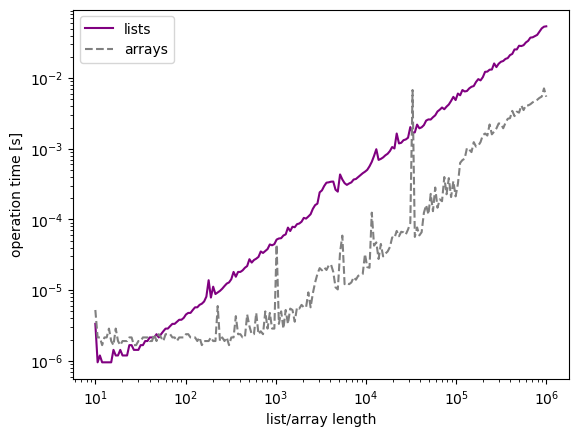

In [3]:
### solution starts here

import matplotlib.pyplot as plt
import numpy as np
import time

def time_to_update(length):

    # create list
    x = list(range(length))

    # time to update list
    t1 = time.time()
    for i in range(len(x)):
        x[i] = (x[i] + 1) / 2
    t2 = time.time()
    list_time = t2 - t1

    # create array
    x_arr = np.array(x)

    # time to update array
    t1 = time.time()
    x_arr = (x_arr + 1) / 2
    t2 = time.time()
    arr_time = t2 - t1

    return list_time, arr_time

num_lengths = 200
lengths = np.logspace(1, 6, num_lengths)
list_times = np.empty(num_lengths)
arr_times = np.empty(num_lengths)

for i, l in enumerate(lengths):
    t_l, t_a = time_to_update(int(l))
    list_times[i] = t_l
    arr_times[i] = t_a


plt.figure(dpi=100)
plt.plot(lengths, list_times, color='purple', label='lists')
plt.plot(lengths, arr_times, color='grey', ls='--', label='arrays')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('list/array length')
plt.ylabel('operation time [s]')
plt.legend()

## Activity #2 (Theory: when to use loops)

Should you use a for loop in each of the following scenarios? Why or why not?

Scenario 1: I want to multiply each element in an array by 10.

Scenario 2: I'm writing a quicklook reduction pipleine that will run in real time (so it needs to be as fast as possible). I need to convolve each pixel in an image with the same kernel function.

Scenario 3: I'm writing an open-source data anlysis package that will be used and modified by many people. I have 10,000 images that I need to run the same set of functions on.

### Answers

1. No for loop! It will be faster and more readable to just multiply the array by 10.

2. No for loop! Speed is important, so we should work to cut down the number of for loops in our code. The operation that we need to perform (convolution) is pretty amenable to array operations. 

3. For loop! We're running many functions several times in a row, and readability is important. For loops are generally easier to understand for users (and developers) than array operations, especially when you're dealing with lots of complicated functionality. It's also easier to make modifications to the code within a for loop, so it's better not to use array operations in this case.

## Activity #3 (pandas with real data) [ADVANCED]

Lets load a couple files into a Pandas DataFrame and rearrange and merge them into a single file in a more useful format. `example_data/star_names.json` contains a list star names. If you're runing this notebook on google colab, you'll need to upload the files in codeastro/exampe_data here (click on the file button on the left, then right-click on sample_data, then upload). The `primary_name` column is the primary ID for the star. For each unique `primary_name` there are many `other_names` associated with it. Each `primary_name`+`other_name` combination is stored in a separate row.

For Colab users, you'll need to upload `star_names.json` and `star_props.csv` files onto Colab first.

1. First load the file `example_data/star_names.json` into a Pandas DataFrame. The file is in JSON format so you might look into the `pandas.read_json` function.

2. Group the DataFrame on the `primary_name` column and create a custom aggregation function that takes all of the values in the `other_name` column that have the same `primary_name` and converts them into a single string deliminated with a pipe (`|`).
  * Hint: check out string joins in python
  * Hint: check out pandas custom aggregation function examples online   

3. Load the `example_data/star_props.csv` file into a separate DataFrame and merge this with the grouped DataFrame from step #2.

4. Save the result as a new CSV file. The resulting file should look like `example_data/stars_merged.csv`. You may also load this file into Pandas to see what the final DataFrame should look like before saving to a CSV.

In [4]:
from pandas import read_json, read_csv

# step 1
starnames_df = read_json('example_data/star_names.json')

# step 2
def combine_names(other_names_list):

    # add pipes between each other name
    output_str = ''
    for n in other_names_list:
        output_str += '{}|'.format(n)
    
    # remove last pipe
    output_str = output_str[:-1]

    return output_str

aggregations = {'other_name': combine_names}
starnames_df = starnames_df.groupby('primary_name').agg(aggregations)

# step 3
starprops_df = read_csv('example_data/star_props.csv')

merged_df = starnames_df.merge(starprops_df, on='primary_name')

# step 4
merged_df.to_csv('stars_merged.csv')